In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import ascent

from theano import tensor as T, function
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD

# Input image and filter

numpy.ndarray

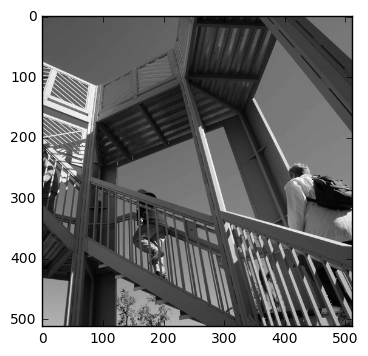

In [3]:
img = ascent()
plt.imshow(img, cmap='gray')

I = img.reshape((1, 1, img.shape[0], img.shape[1]))
type(img)

In [4]:
# Try a border detection filter
w_1 = [[0., 0., 0., 0., 0.],
      [0., 0., 1., 0., 0.],
      [0., 1., 4., 1., 0.],
      [0., 0., 1., 0., 0.],
      [0., 0., 0., 0., 0.]]
w_1 = np.asarray(w_1).reshape((1, 1, 5, 5)) # dimensions: (input channels, output channels, rows, columns)
w_2 = np.random.randn(1, 1, 5, 5) # try a random filter

w_3 = [[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]]

w_3 = np.asarray(w_3).reshape((1, 1, 11, 11))
w_4 = np.random.randn(1, 1, 11, 11) # try a random filter

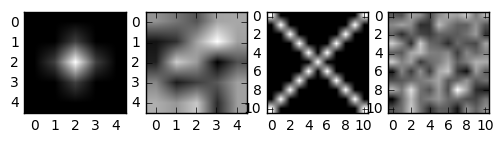

In [5]:
plt.subplot(141)
plt.imshow(w_1[0, 0], cmap='gray')

plt.subplot(142)
plt.imshow(w_2[0, 0], cmap='gray')

plt.subplot(143)
plt.imshow(w_3[0, 0], cmap='gray')

plt.subplot(144)
plt.imshow(w_4[0, 0], cmap='gray')

# Theano convolution

In [6]:
X, W = T.tensor4s('X', 'W')
Y_1 = T.nnet.conv.conv2d(X, W, border_mode='valid', image_shape=I[:1].shape, filter_shape=w_1.shape)
F_1 = function([X, W], Y_1, allow_input_downcast=True)

Y_2 = T.nnet.conv.conv2d(X, W, border_mode='valid', image_shape=I[:1].shape, filter_shape=w_3.shape)
F_2 = function([X, W], Y_2, allow_input_downcast=True)

In [7]:
I.shape

(1L, 1L, 512L, 512L)

(512L, 512L)
(1L, 1L, 508L, 508L)
(1L, 1L, 508L, 508L)


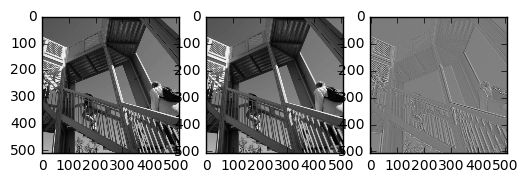

In [8]:
out_1 = F_1(I, w_1)
out_2 = F_1(I, w_2)

print(img.shape)
print(out_1.shape)
print(out_2.shape)

plt.subplot(131)
plt.imshow(img, cmap='gray')

plt.subplot(132)
plt.imshow(out_1[0, 0], cmap='gray')

plt.subplot(133)
plt.imshow(out_2[0, 0], cmap='gray')

(512L, 512L)
(1L, 1L, 502L, 502L)
(1L, 1L, 502L, 502L)


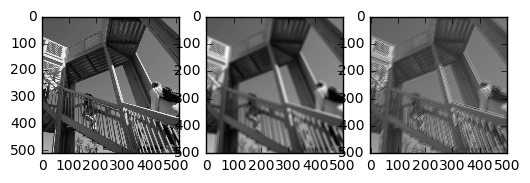

In [9]:
out_3 = F_2(I, w_3)
out_4 = F_2(I, w_4)

print(img.shape)
print(out_3.shape)
print(out_4.shape)

plt.subplot(131)
plt.imshow(img, cmap='gray')

plt.subplot(132)
plt.imshow(out_3[0, 0], cmap='gray')

plt.subplot(133)
plt.imshow(out_4[0, 0], cmap='gray')

# Keras convolution

In [11]:
nb_output_chan = 1
nb_rows = 5
nb_cols = 5

model_1 = Sequential()
model_1.add(Convolution2D(nb_output_chan, nb_rows, nb_cols, border_mode='valid', input_shape=I.shape[1:]))
model_1.add(MaxPooling2D(pool_size=(8, 8)))

model_1.compile(loss='mse', optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True))

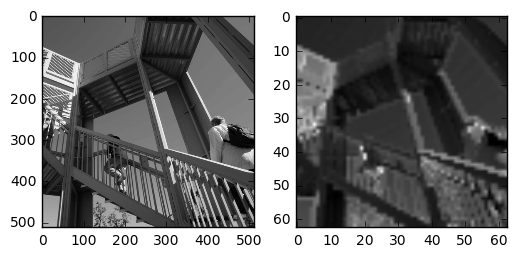

In [13]:
out_1 = model_1.predict(I)

plt.subplot(121)
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.imshow(out_1[0, 0], cmap='gray')

In [12]:
model_2 = Sequential()
model_2.add(Convolution2D(nb_output_chan, nb_rows, nb_cols, border_mode='valid', input_shape=I.shape[1:]))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.compile(loss='mse', optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True))

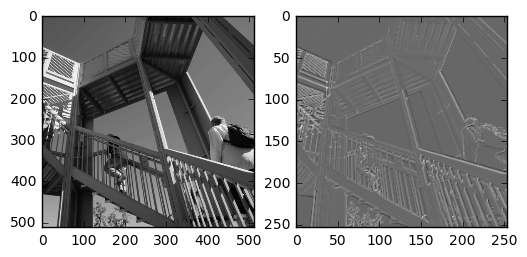

In [14]:
out_2 = model_2.predict(I)

plt.subplot(121)
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.imshow(out_2[0, 0], cmap='gray')

# THE CHALLENGE: Train appropriate filters W